In [1]:
import numpy as np
from neuron import *
from synapse import *
import matplotlib.pyplot as plt

In [2]:
T = 500
dt = 0.125
timeline = np.arange(0, T+dt, dt)

In [3]:
neuron_param = NeuronParam(t_refractory = 5,
                           V_rest = 0,
                           V_thr = 5,
                           V_min = 0,
                           leak = 0.25, 
                           record = True)

In [4]:
n0 = 5
input_spikes = np.random.randint(0,2,size=(n0,len(timeline)))

In [5]:
n1 = n0
n2 = 3

layer_1 = [SimpleNeuron(neuron_param) for _ in range(n1)]
synapse_1 = Synapse(5,layer_1)
synapse_1.identity_initialize()

layer_2 = [SimpleNeuron(neuron_param) for _ in range(n2)]
synapse_2 = Synapse(n1,layer_2)
synapse_2.random_initialize(0,5)

In [6]:
spiketrain_1 = []
for i,t in enumerate(timeline):
    spikes = synapse_1.run(input_spikes[:,i],t)
    spiketrain_1.append(spikes)
spiketrain_1 = np.array(spiketrain_1).T

spiketrain_2 = []
for i,t in enumerate(timeline):
    spikes = synapse_2.run(spiketrain_1[:,i],t)
    spiketrain_2.append(spikes)
spiketrain_2 = np.array(spiketrain_2).T

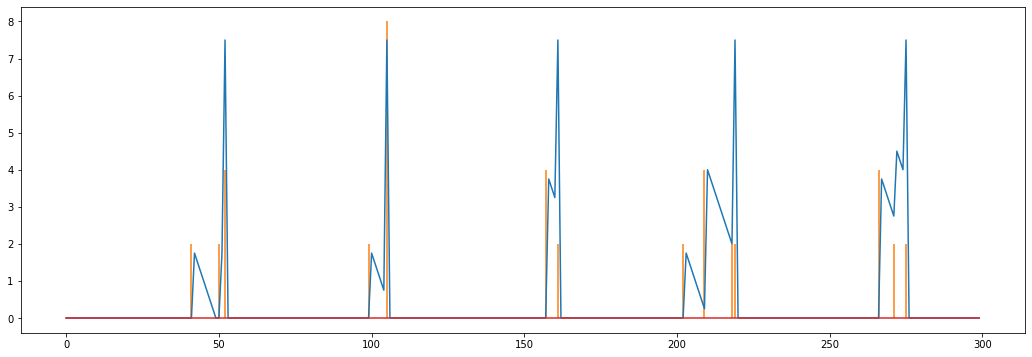

In [8]:
start = 300
end = start + 300
post_idx = 0

target_neuron = layer_2[0]

plt.figure(figsize=(18,6))
plt.plot(target_neuron.V_history[start:end])
plt.stem(np.array(target_neuron.epsp_history[start:end]),markerfmt=" ",linefmt='C1-')
#for i,neuron in enumerate(pre_neurons):
#    plt.stem(neuron.spike[:duration]*w12[i,post]*5,markerfmt=" ",linefmt='C1-')
plt.show()